<a href="https://colab.research.google.com/github/ajaysuyal7/machine-learning/blob/main/linear_regression_bikemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/linear_train.csv')

In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
df1=df.drop('datetime',axis=1)

<Axes: >

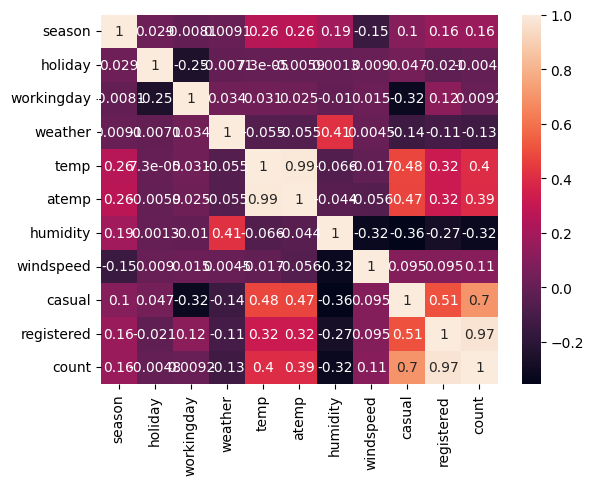

In [ ]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df1=df1.apply(lambda x :x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

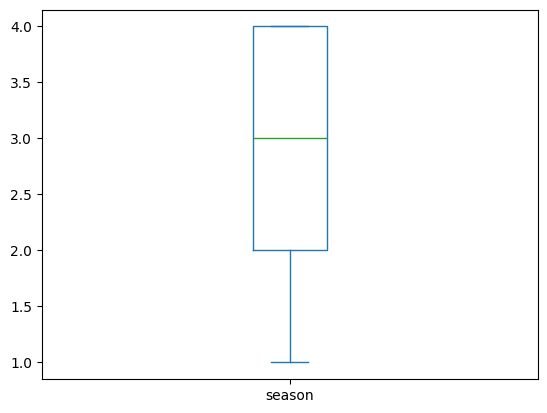

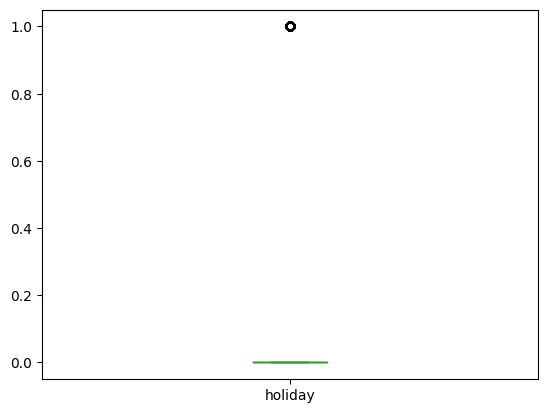

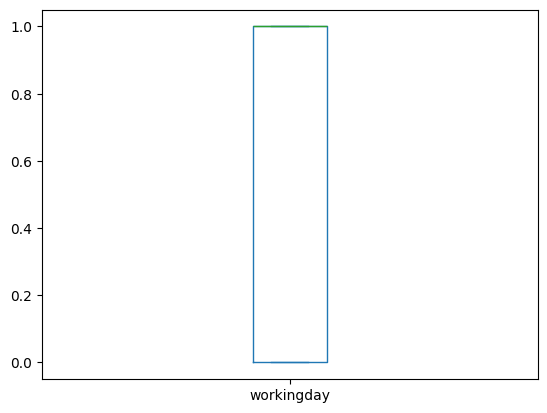

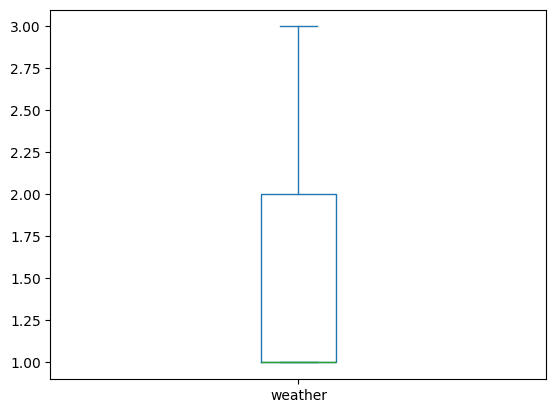

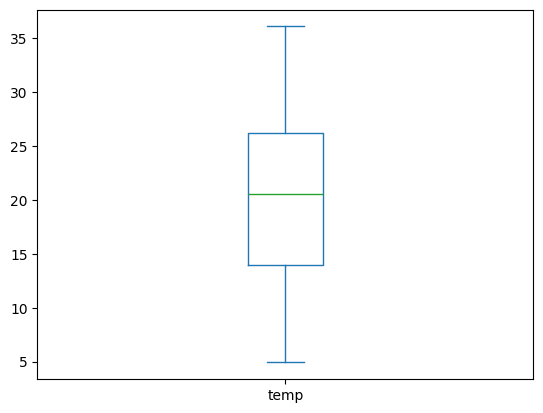

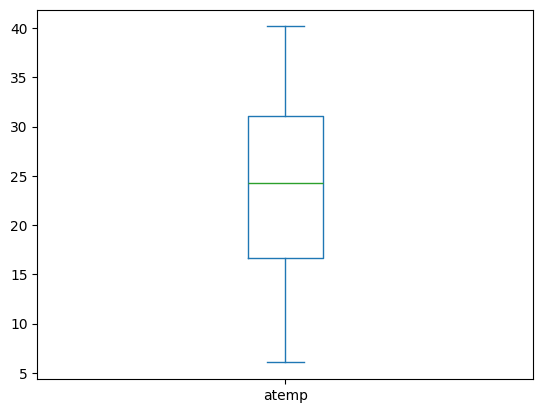

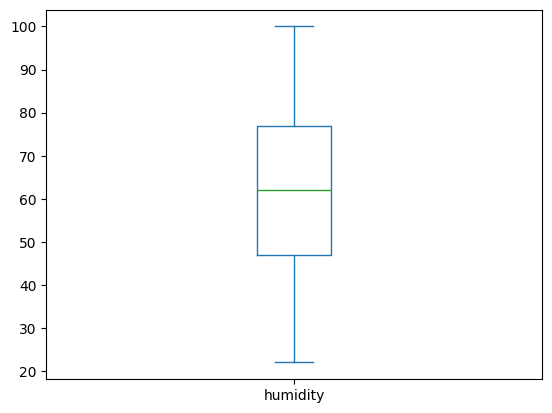

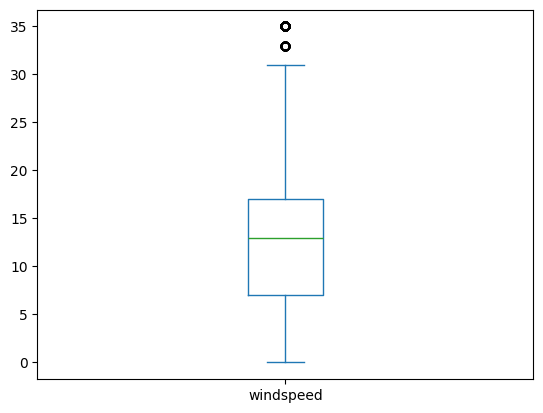

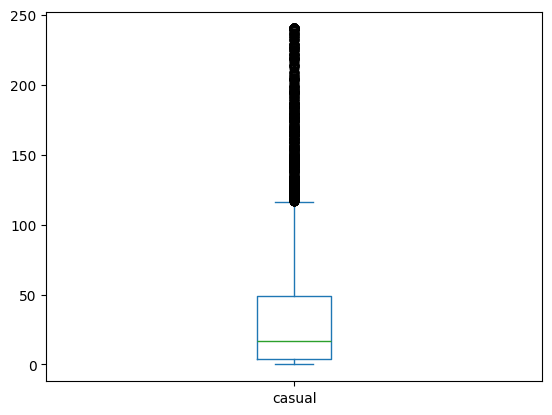

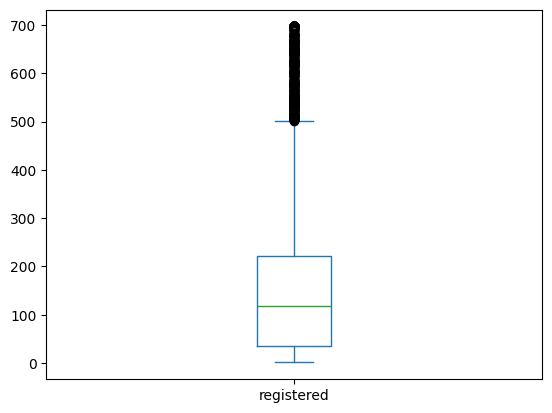

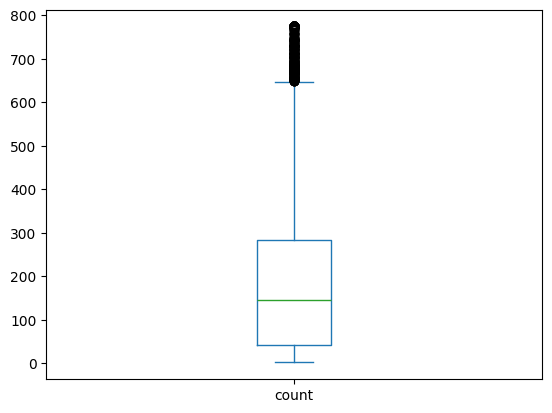

In [ ]:
import matplotlib.pyplot as plt

for column in df1.columns:
    df1[column].plot(kind='box')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [ ]:
x=df1.drop('count',axis=1)
y=df1['count']


In [ ]:
y.skew()

1.16411479031608

In [ ]:
np.sqrt(y).skew()

0.23805709416558343

In [ ]:
y1=np.sqrt(y)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y1,test_size=42,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
train_pred=model.predict(train_x)

In [ ]:
r2_score(train_y**2,train_pred**2)

0.9039046668242952

In [ ]:
mean_absolute_percentage_error(train_pred,train_y)

0.16632249214571276

In [ ]:
mean_absolute_percentage_error(train_pred**2,train_y**2)   # when doing with the actual value

0.2931395189820958

In [ ]:
test_pred=model.predict(test_x)
r2_score(test_y,test_pred)

0.9258315699275498

In [ ]:
r2_score(test_y**2,test_pred**2)

0.933145029579731

In [ ]:
mean_absolute_percentage_error(test_pred,test_y)

0.19214730882641848

In [ ]:
mean_absolute_percentage_error(test_pred**2,test_y**2)

0.3305135295115469

In [ ]:
r2_score(train_pred,train_y)

0.9249411896809406

In [ ]:
from sklearn.linear_model import Lasso,Ridge

l1=Lasso()
l1.fit(train_x,train_y)
train_pred_lasso=l1.predict(train_x)
r2_score(train_y,train_pred_lasso)

0.928824218620997

In [ ]:
mean_absolute_percentage_error(train_y,train_pred_lasso)

0.2859823208762827

In [ ]:
mean_absolute_percentage_error(train_y**2,train_pred_lasso**2)

0.9197432686370798

In [ ]:
r2_score(train_y**2,train_pred_lasso**2)

0.9021315672091937

In [ ]:
test_pred_y=l1.predict(test_x)
print(r2_score(test_y,test_pred_y))
mean_absolute_percentage_error(test_y,test_pred_y)

0.9232069480446287


0.33983917706872735

In [ ]:
print(r2_score(test_y**2,test_pred_y**2))
mean_absolute_percentage_error(test_y**2,test_pred_y**2)

0.9353135399484457


1.073728562332305

In [ ]:
standard=StandardScaler()
train_x=standard.fit_transform(train_x)
test_x=standard.transform(test_x)

In [ ]:
scm=LinearRegression()
scm.fit(train_x,train_y)
train_pred_scm=scm.predict(train_x)
r2_score(train_y,scm.predict(train_x))

0.9301816704364452

In [ ]:
print(r2_score(train_y**2,train_pred_scm**2))
mean_absolute_percentage_error(train_y**2,train_pred_scm**2)

0.9039046668242949


0.8847000856306417

In [ ]:
mean_absolute_percentage_error(train_y,train_pred_scm)

0.27943777737345216

In [ ]:
# error metrics always find in the actual values

test_pred_scm=scm.predict(test_x)
print(r2_score(test_y**2,test_pred_scm**2))
mean_absolute_percentage_error(test_y,test_pred_scm)

0.9331450295797309


0.32884296368178606

In [ ]:
from sklearn.model_selection import GridSearchCV

model=LinearRegression()
parameters={'fit_intercept':[True,False],'copy_X':[True,False]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5,scoring='r2')
grid.fit(train_x,train_y)
print(grid.best_params_)
print(grid.best_score_)

{'copy_X': True, 'fit_intercept': True}
0.9299798213066897


In [ ]:
test_y.shape

(42,)

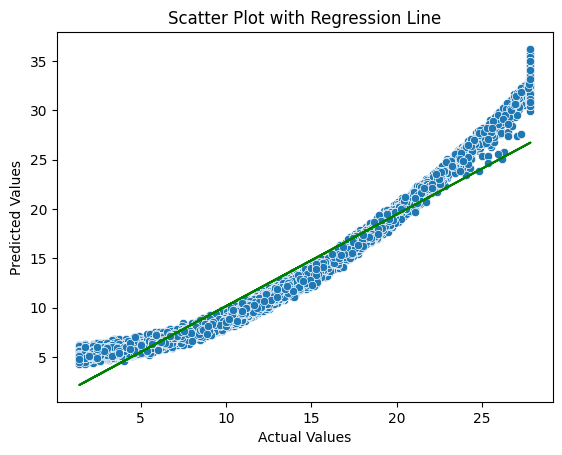

In [ ]:
import numpy as np

# Scatter plot
sns.scatterplot(x=train_y, y=train_pred_scm)

# Fit a line
coefficients = np.polyfit(train_y, train_pred_scm, 1)
poly = np.poly1d(coefficients)
plt.plot(train_y, poly(train_y), color='green')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')
plt.show()
